In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

from plotnine import *

**Wczytanie danych**

In [64]:
df = pd.read_csv('wina.csv', delimiter=',')
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


**Standaryzacja**

In [65]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [66]:
sc_Stand = StandardScaler()
X = sc_Stand.fit_transform(X)
X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

**Predykcja metodą KNN dla wszystkich cech**

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [68]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

KNeighborsClassifier()

**Ocena jakości klasyfikatora**

In [69]:
print("Wszystkie zmienne:", neigh.score(X_train, y_train))

Wszystkie zmienne: 0.9758064516129032


In [70]:
y_pred = neigh.predict(X_test)

In [71]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[25  0  0]
 [ 0 19  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        10

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



**Redukcja przestrzeni cech**

In [72]:
from sklearn.decomposition import PCA

In [73]:
pca = PCA().fit(X)

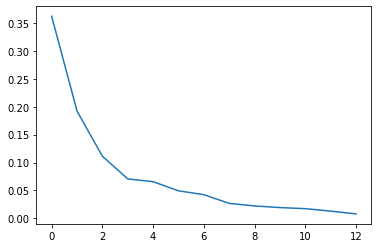

In [74]:
plt.plot(pca.explained_variance_ratio_)

Na podstawie powyższego wykresu zauważyć można, że istotność dla predykcji przy więcej niż trzech cechach stanowczo spada. Dla zredukowanego modelu użyte zostaną trzy cechy. 

In [75]:
licz_pc = 3
ladunki = pca.components_[:licz_pc].T
skladowe = ["PC"+str(i) for i in range(1, licz_pc+1)]
ladunki_df = pd.DataFrame(ladunki, columns = skladowe,
                        index=df.columns[:-1])
ladunki_df

,PC1,PC2,PC3
x1,0.144329,-0.483652,-0.207383
x2,-0.245188,-0.224931,0.089013
x3,-0.002051,-0.316069,0.626224
x4,-0.239320,0.010591,0.612080
x5,0.141992,-0.299634,0.130757
x6,0.394661,-0.065040,0.146179
x7,0.422934,0.003360,0.150682
x8,-0.298533,-0.028779,0.170368
x9,0.313429,-0.039302,0.149454
x10,-0.088617,-0.529996,-0.137306


**Utworzenie nowego zbioru danych dla danych zredukowanych**

In [76]:
X_PCA = pca.transform(X)
X_PCA2 = X_PCA[:,0:3]

**Predykcja metodą KNN dla zredukowanych cech**

In [77]:
X_PCA2_train, X_PCA2_test, y_PCA2_train, y_PCA2_test = train_test_split(X_PCA2, y, test_size=0.30)

In [78]:
neigh_PCA = KNeighborsClassifier(n_neighbors=5)
neigh_PCA.fit(X_PCA2_train, y_PCA2_train)

KNeighborsClassifier()

**Ocena jakości klasyfikatora dla zredukowanych cech**

In [88]:
print("Zredukowane zmienne:", neigh_PCA.score(X_PCA2_train, y_PCA2_train))

Zredukowane zmienne: 0.9838709677419355


In [89]:
y_pred_PCA = neigh_PCA.predict(X_PCA2_test)

In [90]:
print(confusion_matrix(y_PCA2_test, y_pred_PCA))
print(classification_report(y_PCA2_test, y_pred_PCA))

[[15  1  0]
 [ 1 17  0]
 [ 0  0 20]]
              precision    recall  f1-score   support

           1       0.94      0.94      0.94        16
           2       0.94      0.94      0.94        18
           3       1.00      1.00      1.00        20

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54

